In [9]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")

from skimage import io
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
import seaborn as sns; sns.set()

# Loading Images Dataset and Analyzing the Properties of Images

The image shape contains the rows, columns and channels in the image.

In [54]:
pics = []
for i in range(1, 5): 
    pics.append(imread(f'ex ({i}).jpg'))

for i in range(1, 3): 
    pics.append(imread(f'ex ({i}).png'))


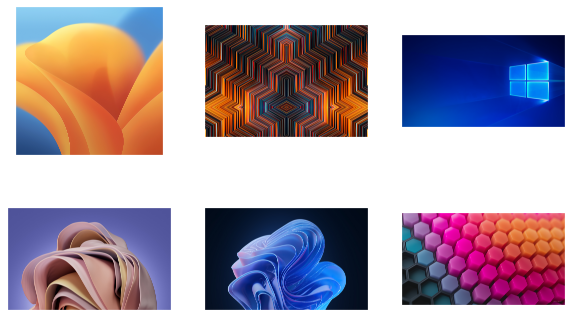

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), subplot_kw=dict(xticks=[], yticks=[]))
axes = axes.ravel()
for i in range(6): 
    axes[i].imshow(pics[i]);
plt.show()

In [57]:
pics_1d = []
for i in range(len(pics)): 
    pic = pics[i] / 255.0 # use 0...1 scale
    pic = pic.reshape(pics[i].shape[0] * pics[i].shape[1], 3)
    pics_1d.append(pic)


In [72]:
def plot_pixels(pic, real_pic, title, colors=None, N=10000):
    if colors is None:
        colors = pic
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(pic.shape[0])[:N]
    colors = colors[i]
    R, G, B = pic[i].T
    
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    ax[2].imshow(real_pic)

    fig.suptitle(title, size=20);

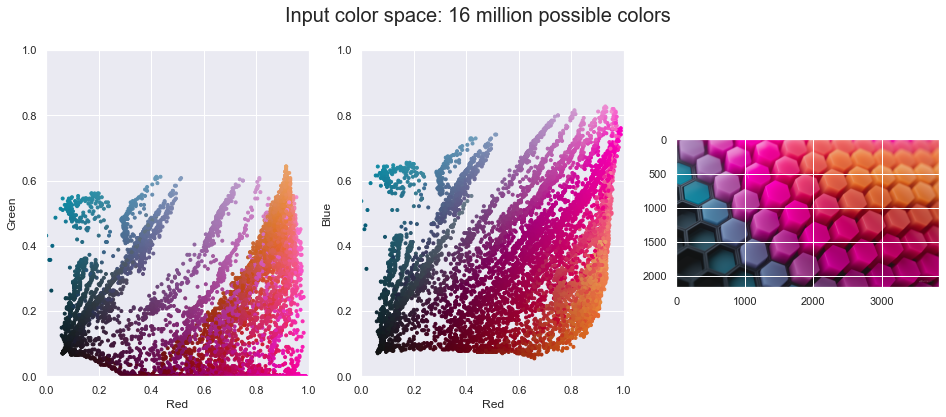

In [73]:
plot_pixels(pics_1d[5], pics[5], title='Input color space: 16 million possible colors')

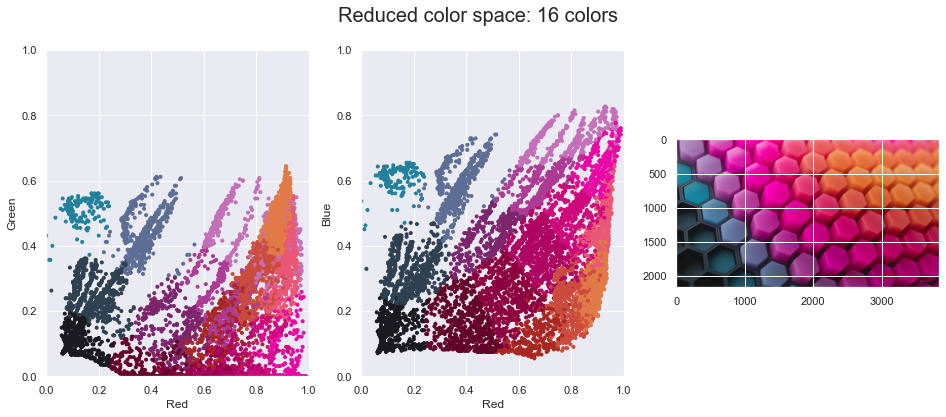

In [79]:
import warnings; warnings.simplefilter('ignore')  # Kar e dorosti nist :D vali khob ...

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(pics_1d[5])
new_colors = kmeans.cluster_centers_[kmeans.predict(pics_1d[5])]

plot_pixels(pics_1d[5], real_pic=pics[5], colors=new_colors,
            title="Reduced color space: 16 colors")

# Plotting New Colors in Image Space

In [96]:
pic_recolored = new_colors.reshape(pics[5].shape)

plt.axis('off')

plt.imshow(pic_recolored)
plt.savefig("example_pic_redued.png", dpi=500)
plt.clf()

<Figure size 432x288 with 0 Axes>

7 MB to 600KB using 16-color Image

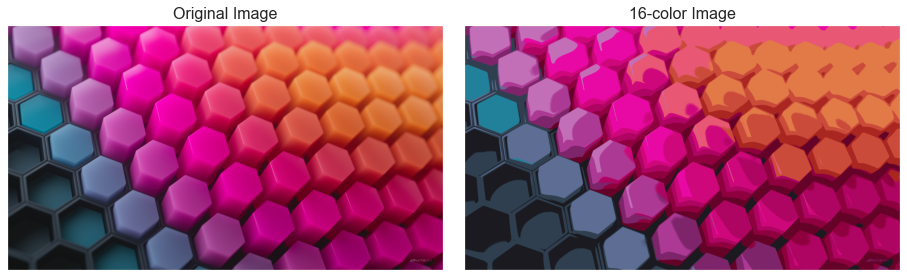

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(pics[5])
ax[0].set_title('Original Image', size=16)
ax[1].imshow(pic_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("pic_kmean.png", dpi=125)